#Python Control Systems

**Table of Contents**
- Installation
- ODE Solver
- Laplace Transforms & Inverse Laplace Transforms 
  - Partial Fraction Expansion
- Modeling of Linear Systems
  - Transfer Function Models
  - State-space Models
  - Model Connections
- Linear System Response
  - Step Response
  - Impulse Response
  - Forced Response
- Basic Controllers
  - P, PI, PD, PID Controls

## Installation

In [155]:
!pip install control

     |████████████████████████████████| 256kB 6.6MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=7bb9b21143aeee92167fa42e50fea14bbcfba6578690cb2e54877a62893e2518
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


## ODE Solver

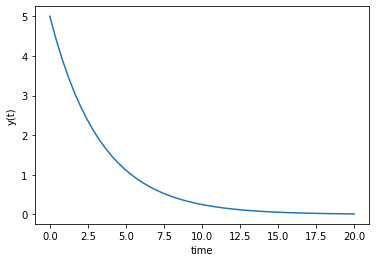

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


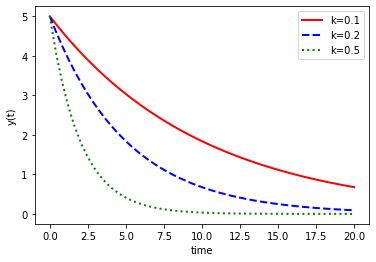

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

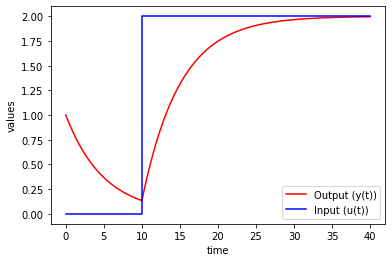

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

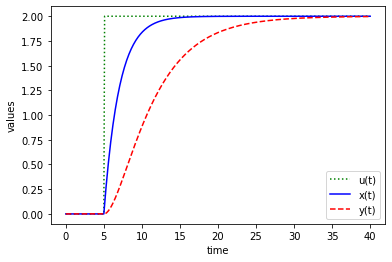

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### Stable and Unstable Equilibrium Points
- System equation $\dot{x} = -x + x^2$

- $x_0 = 0$ is the stable equilibrium point and 
- $x_0=-1$ is an unstable equilibrium point.

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


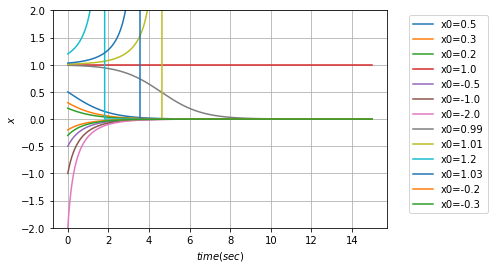

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(x,t):
  xdot = -x + x*x
  return xdot

# initial condition
x0 = [0.5, 0.3, 0.2, 1.0, -0.5, -1.0, -2.0, 0.99, 1.01, 1.2, 1.03, -0.2, -0.3]

# number of time points
n = 1000

fig = plt.figure()

# time points
t = np.linspace(0,15,n)

for i in range(len(x0)):
  x00 = x0[i]
  x = odeint(model, x00, t)
  plt.plot(t, x, '-', label='x0={}'.format(x0[i]))
  plt.ylim((-2,2))

plt.grid()
plt.xlabel('$time (sec)$')
plt.ylabel('$x$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Lorentz Attractor

State-space model

\begin{eqnarray}
\dot{x} &=& \sigma(y-x) \\
\dot{y} &=& (\rho - z)x - y \\
\dot{z} &=& xy - \beta z
\end{eqnarray}

where $\sigma = 10$, $\rho = 28$ and $\beta = 8/3$. 

Text(0.5, 0, 'Z')

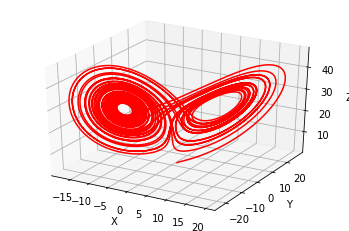

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(Z,t):
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0
  x = Z[0]
  y = Z[1]
  z = Z[2]
  dxdt = sigma * (y - x)
  dydt = rho * x - y - x * z
  dzdt = x * y - beta * z
  dz = [dxdt, dydt, dzdt]
  return dz

# initial condition
z0 = [1, 1, 1]

# number of time points
n = 10000

# time points
t = np.linspace(0,40,n)
# solve ODE
Z = odeint(model, z0, t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(Z[:,0], Z[:,1], Z[:,2], 'r-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


### Vander-Pol Oscillator

\begin{eqnarray}

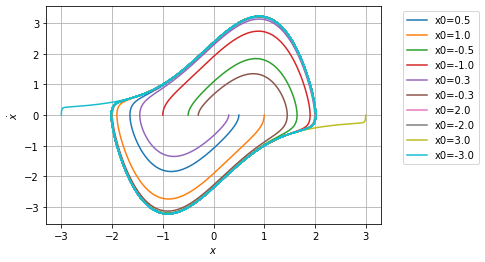

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
  mu = 1.5
  x = z[0]
  xdot = z[1]
  xddot = -x + mu * (1 - x*x)*xdot
  dz = [xdot, xddot]
  return dz

# initial condition
z00 = [0.5, 1.0, -0.5, -1.0, 0.3, -0.3, 2.0, -2.0, 3.0, -3.0]

# number of time points
n = 10000

fig = plt.figure()
# time points
t = np.linspace(0,40,n)

for i in range(len(z00)):
  z0 = [z00[i], 0]
  z = odeint(model, z0, t)
  plt.plot(z[:,0],z[:,1], label='x0={}'.format(z00[i]))

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Laplace Transforms

In [1]:
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

# Laplace transform (t->s)
U = laplace_transform(5*t, t, s)
print('U')
print(U[0])
# Result: 5/s**2

# Inverse Laplace transform (s->t)
X = inverse_laplace_transform(U[0],s,t)
print('X')
print(X)
# Result: 5*t*Heaviside(t)

# Function
F = 5*(s+1)/(s+3)**2
print('F')
print(F)
# Result: (5*s + 5)/(s + 3)**2

# Partial fraction decomposition
G = sym.apart(F)
print('G')
print(G)
# Result: 5/(s + 3) - 10/(s + 3)**2

# denominator of transfer function
d1 = (s+1)*(s+3)*(s**2+3*s+1)

# expand polynomial
d2 = sym.expand(d1)
print('d2')
print(d2)
# Result: s**4 + 7*s**3 + 16*s**2 + 13*s + 3

# find roots
print(sym.roots(d2))
# Result: {-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}

U
5/s**2
X
5*t*Heaviside(t)
F
(5*s + 5)/(s + 3)**2
G
5/(s + 3) - 10/(s + 3)**2
d2
s**4 + 7*s**3 + 16*s**2 + 13*s + 3
{-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}


### Partial Fraction Expansion


In [5]:
import sympy as sym
from sympy.abc import s,t,x,y,z

f = 1/(s**2*(s**2+1))

print(f)

# PFE
sym.apart(f)


1/(s**2*(s**2 + 1))


-1/(s**2 + 1) + s**(-2)

In [6]:
import sympy as sym
from sympy.abc import s

F = (s+3)/((s+1)*(s+2))

# PFE
sym.apart(F)

-1/(s + 2) + 2/(s + 1)

In [17]:
import sympy as sym
from sympy.abc import s
import numpy as np

F = (s**2+2*s+3)/(s+1)**3

# PFE
print('PFE: ', sym.apart(F))

# method 2 - verification
var = sym.var('A:C')

p1 = A/(s+1)**3
p2 = B/(s+1)**2
p3 = C/(s+1)

h = p1 + p2 + p3
print(h)

h1 = sym.together(h)
print(h1)

f1 = sym.factor(h1, s)
print(f1)

e1 = sym.Eq(f1, F)
print(e1)

eq = sym.Eq(sym.numer(e1.lhs), sym.numer(e1.rhs))
print(eq)
coeff = sym.solve_undetermined_coeffs(eq, [A,B,C], s)
print(coeff)

h1.subs(coeff)
print(h1)

PFE:  1/(s + 1) + 2/(s + 1)**3
A/(s + 1)**3 + B/(s + 1)**2 + C/(s + 1)
(A + B*(s + 1) + C*(s + 1)**2)/(s + 1)**3
(A + B + C*s**2 + C + s*(B + 2*C))/(s + 1)**3
Eq((A + B + C*s**2 + C + s*(B + 2*C))/(s + 1)**3, (s**2 + 2*s + 3)/(s + 1)**3)
Eq(A + B + C*s**2 + C + s*(B + 2*C), s**2 + 2*s + 3)
{A: 2, B: 0, C: 1}
(A + B*(s + 1) + C*(s + 1)**2)/(s + 1)**3


## Linear System Models
- State Space Models
- Transfer Function Models
- Model Connections

In [25]:
from control import *
a = [[0,1],[-1,-1]]
b = [[0],[1]]
c = [1, 0]
d = 0
sys = ss(a,b,c,d)
print(sys)

g = tf(1, [1,1,1])
print(g)

# casting TF to SS
sys2 = ss(g)
print(sys2)

# casting SS to TF
g2 = tf(sys)
print(g2)

A = [[ 0.  1.]
 [-1. -1.]]

B = [[0.]
 [1.]]

C = [[1. 0.]]

D = [[0.]]


     1
-----------
s^2 + s + 1

A = [[-1. -1.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[0. 1.]]

D = [[0.]]


     1
-----------
s^2 + s + 1



### Model Interconnections
- Series
- Parallel
- Feedback

In [26]:
from control import *

g1 = tf(1,[1,1])
g2 = tf(1, [1,2])

# Parallel connection
g3 = parallel(g1,g2)
print(g3)

# series connection
g4 = series(g1,g2)
print(g4)

# Feedback connection
g5 = feedback(g1,g2,-1) 
print(g5)


   2 s + 3
-------------
s^2 + 3 s + 2


      1
-------------
s^2 + 3 s + 2


    s + 2
-------------
s^2 + 3 s + 3



## Response of Linear Systems
- Step Response
- Impulse Response
- Forced Response
- Initial Condition Response

### Step response



     1
-----------
s^2 + s + 1



Text(0, 0.5, 'y')

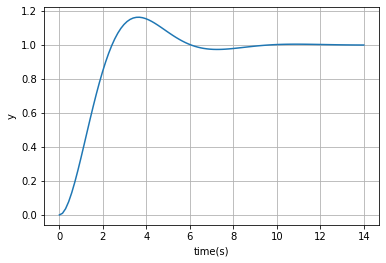

In [36]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1,1])
print(g)

# step response
t,y = step_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')


### Impulse Response

Text(0, 0.5, 'y')

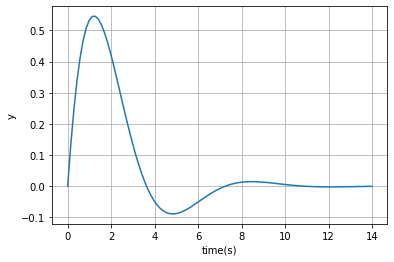

In [28]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1,1])

t,y = impulse_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

Text(0, 0.5, 'y')

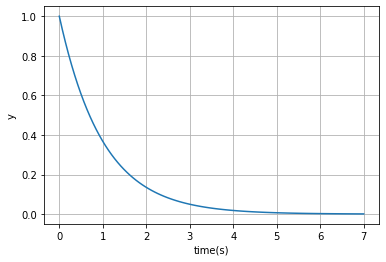

In [37]:
from control import *
import matplotlib.pyplot as plt

g = tf(1, [1,1])
t,y = impulse_response(g)

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

### Initial Response

Text(0, 0.5, 'y')

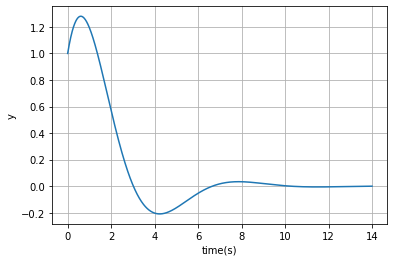

In [30]:
from control import *
a = [[0,1],[-1,-1]]
b = [[0],[1]]
c = [1, 0]
d = 0
sys = ss(a,b,c,d)

t,y = initial_response(sys, X0=[1,1])

plt.plot(t,y)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('y')

### Forced Response

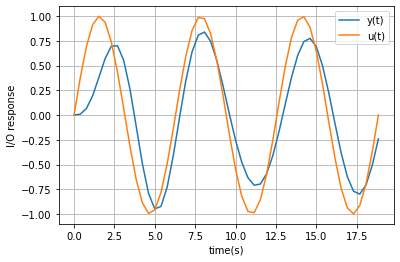

In [35]:
from control import *
from math import pi
import numpy as np

g = tf([1,2],[1,2,3,4])
t = np.linspace(0, 6*pi)
u = np.sin(t)

t,y,x = forced_response(g,t,u)

plt.plot(t,y,label='y(t)')
plt.plot(t,u,label='u(t)')
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('I/O response')
plt.legend(loc='best')

### Ramp Response


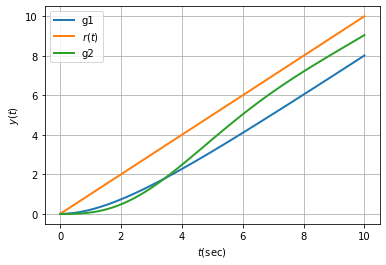

In [17]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

g1 = tf(1, [2,1]) # first order system
g2 = tf(1, [2, 1, 1]) # second order system

t = np.linspace(0,10, 100)
u = t
t,y1,x1 = forced_response(g1,t,u)
t,y2,x2 = forced_response(g2,t,u)
plt.plot(t,y1, lw = 2, label='g1')
plt.plot(t,u, lw = 2, label='$r(t)$')
plt.plot(t,y2,lw = 2, label='g2')
plt.grid()
plt.xlabel('$t$(sec)')
plt.ylabel('$y(t)$')
plt.legend(loc='best')

## Second order system

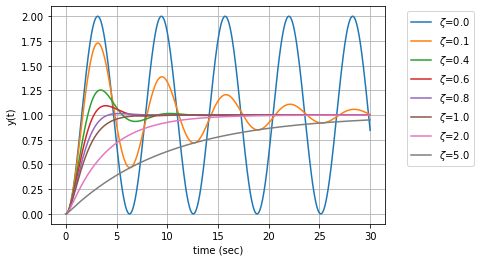

In [3]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

zeta = [0.0, 0.1, 0.4, 0.6, 0.8, 1.0, 2.0, 5.0]
wn = 1.0

t = np.linspace(0,30, 1000)

# plot response for each value of zeta
for i in range(len(zeta)):

  g = tf(wn*wn, [1, 2*zeta[i]*wn, wn*wn])
  t,y = step_response(g,t)
  plt.plot(t,y, label='$\zeta$={}'.format(zeta[i]))
  
plt.grid()
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(bbox_to_anchor=(1.05,1))


### DC Motor Control
- Position feedback
- With Velocity feedback - improves transient response of the CL system with lower rise time, lower peak overshoot etc. 


   1
-------
s^2 + s


    1
---------
s^2 + 2 s


     1
-----------
s^2 + s + 1


      1
-------------
s^2 + 2 s + 1



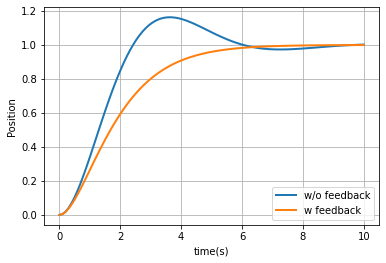

In [10]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

K = 1.0
J = 1.0
B = 1.0
H = 1.0  # velocity feedback gain

# open-loop system
g1 = tf(K, [J, B, 0])
print(g1)

# open-loop system with velocity feedback
g2 = tf(K, [J, (B+K*H), 0])
print(g2)

# closed-loop system
gc1 = feedback(g1, 1, -1) 
print(gc1)
gc2 = feedback(g2, 1, -1)
print(gc2)

t = np.linspace(0, 10, 100)
t,y1 = step_response(gc1,t)
t,y2 = step_response(gc2,t)
plt.plot(t,y1, lw = 2, label='w/o feedback')
plt.plot(t,y2, lw = 2, label='w feedback')
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('Position')
plt.legend(loc='best')

## Basic Controllers
- P Controllers
- Integral Controllers
- PD controllers
- PD controllers
- PID controllers

### Closed-loop and Open-loop system response
- It shows the effect of simple negative feedback.
- Negative feedback stabilizes the system.
- Open-loop system is unstable.
- Positive feedback destabilizes the system.

Open-loop system: 
   1
-------
s^2 + s

Closed-loop system with negative feedback: 
     1
-----------
s^2 + s + 1

Closed-loop system with positive feedback: 
     1
-----------
s^2 + s - 1



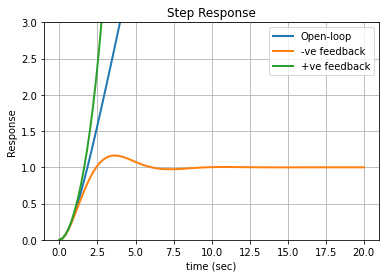

In [10]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# open-loop system
g1 = tf(1, [1, 1, 0])
print('Open-loop system:', g1)

# closed-loop system
gc1 = feedback(g1, 1, -1) # negative feedback
print('Closed-loop system with negative feedback:', gc1)
gc2 = feedback(g1, 1, 1) # positive feedback
print('Closed-loop system with positive feedback:', gc2)

t = np.linspace(0,20,100)
t,y = step_response(g1, t)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)

plt.plot(t, y, lw = 2, label='Open-loop')
plt.plot(t, y1, lw = 2, label='-ve feedback')
plt.plot(t, y2, lw = 2, label='+ve feedback')
plt.ylim((0,3))
plt.xlabel('time (sec)')
plt.ylabel('Response')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

### Liquid-level Control System
- Effect of Integral Action
  - PI Controller: $C(s) = K_p + \frac{K_i}{s}$
  - Open loop system does not have a integrator. So, the closed-loop step response has a steady-state error. 
  - Integral action eliminates SS error but may introduce oscillations



Open loop plant:  
  1
-----
s + 1

Closed-loop system with proportional control: 
  1
-----
s + 2

Closed-loop system with Integral Control: 
     1
-----------
s^2 + s + 1



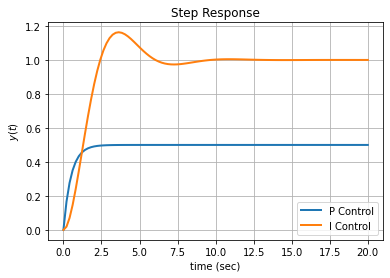

In [12]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# constants
K, R, C = 1, 1, 1

# plant
g = tf(R, [R*C, 1])
print('Open loop plant: ', g)

# controller
c = tf(K,[1, 0])

# closed-loop system
gc1 = feedback(g, 1, -1) # without integrator
print('Closed-loop system with proportional control:', gc1)

gc2 = feedback(series(g,c), 1, -1) # with integrator
print('Closed-loop system with Integral Control:', gc2)

t = np.linspace(0,20,100)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='P Control')
plt.plot(t, y2, lw = 2, label='I Control')
#plt.ylim((0,3))
plt.xlabel('time (sec)')
plt.ylabel('$y(t)$')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

### Inertial Load System
- Study the effect of derivative control action
- PD controller: $C(s) = K_p + K_ds$

Open loop plant:  
 1
---
s^2

Closed-loop system with proportional control: 
   1
-------
s^2 + 1

Closed-loop system with PD Control: 
   s + 1
-----------
s^2 + s + 1



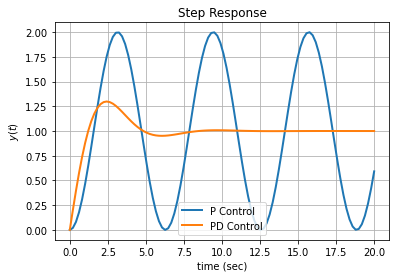

In [4]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# constants
J, Kp, Kd = 1, 1, 1

# plant g = 1/Js^2
g = tf(1, [J, 0, 0])
print('Open loop plant: ', g)

# Prop controller
c1 = tf(Kp, [1])
# PD controller
c2 = tf([Kd, Kp],[1])

# closed-loop system
gc1 = feedback(series(c1, g), 1, -1) 
print('Closed-loop system with proportional control:', gc1)

gc2 = feedback(series(c2,g), 1, -1) 
print('Closed-loop system with PD Control:', gc2)

t = np.linspace(0,20,100)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='P Control')
plt.plot(t, y2, lw = 2, label='PD Control')
#plt.ylim((0,3))
plt.xlabel('time (sec)')
plt.ylabel('$y(t)$')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

### DC Motor Controller
- Effect of P, PD and PID control action.
- Higher value of Kp reduces steady-state error.
- PI eliminates steady-state error but leads to oscillations. 
- PD increases damping and improves the speed of system response.
- Derivative controller, by itself, does not have any effect on steady-state error.
- PID provides the best of PI and PD control action.

Open loop plant:  
     1
-----------
s^2 + 0.5 s

Closed-loop system with P control with Kp = 1: 
       1
---------------
s^2 + 0.5 s + 1

Closed-loop system with P control with Kp = 4: 
       1
---------------
s^2 + 0.5 s + 4

Closed-loop system with PI Controller: 
           s
-----------------------
s^3 + 0.5 s^2 + 4 s + 1

Closed-loop system with PD Controller: 
       1
---------------
s^2 + 1.5 s + 4

Closed-loop system with PID Controller: 
           s
-----------------------
s^3 + 1.5 s^2 + 4 s + 1



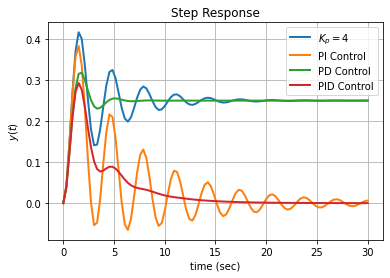

In [11]:
from control import *
import matplotlib.pyplot as plt
import numpy as np

# constants
J, b = 1, 0.5

Kp1 = 1
Kp2 = 4

Ki = 1.0
Kd = 1.0

# plant
g = tf(1, [J, b, 0])
print('Open loop plant: ', g)

# PI controller
c1 = tf([Kp2, Ki],[1, 0])

# PD controller
c2 = tf([Kd, Kp2],[1])

# PID Controller
c3 = tf([Kd, Kp2, Ki],[1, 0])

# closed-loop system 
gc1 = feedback(g, Kp1, -1) # prop cont
print('Closed-loop system with P control with Kp = {}:'.format(Kp1), gc1)

gc2 = feedback(g, Kp2, -1)
print('Closed-loop system with P control with Kp = {}:'.format(Kp2), gc2)

gc3 = feedback(g, c1, -1) # PI control
print('Closed-loop system with PI Controller:', gc3)

gc4 = feedback(g, c2, -1) # PD controller
print('Closed-loop system with PD Controller:', gc4)

gc5 = feedback(g, c3, -1) # PID controller
print('Closed-loop system with PID Controller:', gc5)

t = np.linspace(0,30,100)
t,y1 = step_response(gc1, t)
t,y2 = step_response(gc2, t)
t,y3 = step_response(gc3, t)
t,y4 = step_response(gc4, t)
t,y5 = step_response(gc5, t)

#plt.plot(t, y1, lw = 2, label='$K_p=1$')
plt.plot(t, y2, lw = 2, label='$K_p={}$'.format(Kp2))
plt.plot(t, y3, lw = 2, label='PI Control')
plt.plot(t, y4, lw = 2, label='PD Control')
plt.plot(t, y5, lw = 2, label='PID Control')
plt.xlabel('time (sec)')
plt.ylabel('$y(t)$')
plt.title('Step Response')
plt.grid()
plt.legend(loc='best')

## Stability Analysis
- Poles, zeroes
- Root-Locus
- Bode Plot

Poles: [-1.65062919+0.j         -0.1746854 +1.54686889j -0.1746854 -1.54686889j
  0.        +0.j        ]
Zeros: [-1.]


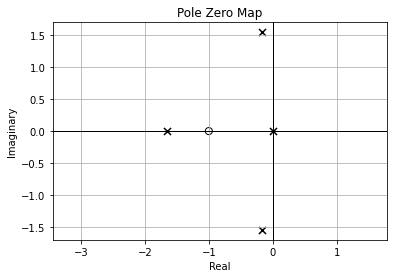

In [12]:
from control import *
import matplotlib.pyplot as plt


g = tf([1,1],[1,2,3,4, 0])

print('Poles:',g.pole())

print('Zeros:', g.zero())

# Pole-Zero map
poles,zeros = pzmap(g)
ax = plt.gca()
ax.grid()

## Root-Locus


### Example 1

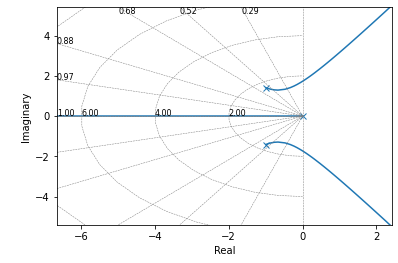

In [2]:
from control import *
import numpy as np
import matplotlib.pyplot as plt

g = tf(1, [1,2,3,0])
k = rlocus(g)


shape of rlist:  (100, 3)
shape of klist:  (100,)


<Figure size 432x288 with 0 Axes>

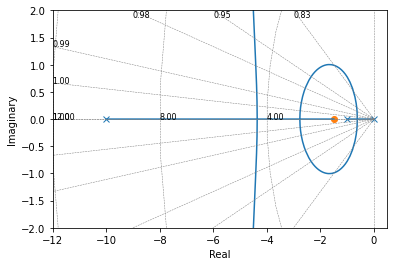

In [18]:
import numpy as np
from matplotlib import pyplot as plt 
import control

#%matplotlib
fig = plt.figure()
G = control.TransferFunction((1, 1.5), (1, 11, 10, 0))

rlist, klist = control.root_locus(G, kvect=np.linspace(-100,100, num=100),
                              xlim=(-12,0.5), ylim=(-2,2))
#rlist, klist = control.rlocus(G, kvect=np.linspace(-100,100, num=100),
#                              xlim=(-12,0.5), ylim=(-2,2))

print('shape of rlist: ', np.shape(rlist))
print('shape of klist: ', np.shape(klist))

plt.show()


Alternate code for Root Locus. 
Code is take from [this](https://apmonitor.com/pdc/index.php/Main/StabilityAnalysis) link. Original code is modified to work with Google Colab.

In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import *
%matplotlib inline

# open loop
num = [4.0]
den = [1.0,6.0,11.0,6.0]

# open-loop poles and zeroes
sys_zeroes = np.roots(num)
sys_poles = np.roots(den)

# Real & Imag Parts of Poles and zeroes
z_real = [sys_zeroes[i].real for i in range(len(sys_zeroes))]
z_imag = [sys_zeroes[i].imag for i in range(len(sys_zeroes))]
p_real = [sys_poles[i].real for i in range(len(sys_poles))]
p_imag = [sys_poles[i].imag for i in range(len(sys_poles))]


# root locus plot
n = 10000 # number of points to plot
nr = len(den)-1 # number of roots
rs = np.zeros((n,2*nr))   # store results 

# Range of Gain
Kc1 = 0.0
Kc2 = 18.0
Kc = np.linspace(Kc1,Kc2,n)  # Kc values
for i in range(n):        # cycle through n times
  # Characteristic Polynomial
  char_poly = np.polyadd(den, Kc[i]*np.asarray(num))
  # Closed loop poles
  roots = np.roots(char_poly)
  for j in range(nr):   # store roots
      rs[i,j] = roots[j].real # store real
      rs[i,j+nr] = roots[j].imag # store imaginary


def update(K=0):
  indx = (np.abs(Kc-K)).argmin()
  for i in range(nr):
    plt.plot(rs[:,i],rs[:,i+nr],'r.',markersize=2)
    if math.isclose(rs[indx,i+nr], 0.0):
      lbl = '{:.2f}'.format(rs[indx,i])
    else:
      lbl = '{:.2f},{:.2f}i'.format(rs[indx,i], rs[indx,i+nr])
    plt.plot(rs[indx, i], rs[indx,i+nr], 'ks', markersize=5,label=lbl)
    
  # Plot open-loop poles and zeros
  plt.plot(z_real, z_imag, 'bo', markersize=5, label='OL zeroes')
  plt.plot(p_real, p_imag, 'mx', markersize=15, label='OL Poles')
  plt.legend(loc='best')
  plt.xlabel('Root (real)')
  plt.ylabel('Root (imag)')
  plt.grid(b=True, which='major', color='b', linestyle='-',alpha=0.5)
  plt.grid(b=True, which='minor', color='r', linestyle='--',alpha=0.5)

interact(update, K=widgets.FloatSlider(value=Kc1,
                                         min = Kc1,
                                         max = Kc2,
                                         step = 0.1))


interactive(children=(FloatSlider(value=0.0, description='K', max=18.0), Output()), _dom_classes=('widget-inte…

<function __main__.update>

### Example 2 
Draw the root locus for the following system: 
$$G(s) = \frac{K(s+2)}{s^2+2s+3}$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import *
import math
%matplotlib inline

def update(kvect, rs, nr, p_real, p_imag, z_real, z_imag, xr, yr, K=0):
  indx = (np.abs(kvect-K)).argmin()
  for i in range(nr):
    plt.plot(rs[:,i], rs[:,i+nr],'r.',markersize=2)
    if math.isclose(rs[indx,i+nr], 0.0):
      lbl = '{:.2f}'.format(rs[indx,i])
    else:
      lbl = '{:.2f},{:.2f}i'.format(rs[indx,i], rs[indx,i+nr])
    plt.plot(rs[indx, i], rs[indx,i+nr], 'ks', markersize=5,label=lbl)
  
  if xr is not None:
    plt.xlim(xr)
  if yr is not None:
    plt.ylim(yr)

  # Plot open-loop poles and zeros
  plt.plot(z_real, z_imag, 'bo', markersize=5, label='OL zeroes')
  plt.plot(p_real, p_imag, 'mx', markersize=15, label='OL Poles')
  plt.legend(bbox_to_anchor=(1.05,1.0))
  plt.xlabel('Root (real)')
  plt.ylabel('Root (imag)')
  plt.grid(b=True, which='major', color='b', linestyle='-',alpha=0.5)
  plt.grid(b=True, which='minor', color='r', linestyle='--',alpha=0.5)


def RootLocus(num, den, kvect, xr=None, yr=None):
  '''
  Plots Root Locus of an open-loop transfer function g = tf(num,den)
  for a given gain vector
  '''

  # open-loop poles and zeroes
  sys_zeroes = np.roots(num)
  sys_poles = np.roots(den)

  # Real & Imag Parts of Poles and zeroes
  z_real = [sys_zeroes[i].real for i in range(len(sys_zeroes))]
  z_imag = [sys_zeroes[i].imag for i in range(len(sys_zeroes))]
  p_real = [sys_poles[i].real for i in range(len(sys_poles))]
  p_imag = [sys_poles[i].imag for i in range(len(sys_poles))]

  Kmin = np.min(kvect)
  Kmax = np.max(kvect)

  n = len(kvect) # no. of data points
  nr = len(den) - 1 # no. of roots
  rs = np.zeros((n, 2*nr)) 

  for i in range(n):
    # Characteristic Polynomial
    char_poly = np.polyadd(den, kvect[i]*np.asarray(num))
    # Closed loop poles
    roots = np.roots(char_poly)
    for j in range(nr):
      rs[i,j] = roots[j].real # real part
      rs[i,j+nr] = roots[j].imag  # imaginary part

  # interactive plot
  interact(update, kvect=fixed(kvect),rs=fixed(rs), nr=fixed(nr),\
           p_real = fixed(p_real), p_imag=fixed(p_imag),
           z_real = fixed(z_real), z_imag = fixed(z_imag),
           xr = fixed(xr), yr = fixed(yr),
           K=widgets.FloatSlider(value=Kmin, min = Kmin, 
                                 max = Kmax, step = 0.001))
  return kvect, rs



In [79]:
num = [1, 2]
den = [1, 2, 3]
K = np.linspace(0,20, 10000)

RootLocus(num, den, K)

interactive(children=(FloatSlider(value=0.0, description='K', max=20.0, step=0.001), Output()), _dom_classes=(…

### Example 3
Draw root locus for the following open loop system:
$$ G(s) = \frac{K}{s(s+0.5)(s^2+0.6s+10)}$$

In [82]:
# Run the cell block that defines RootLocus() function above
num = [1.]
den = [1., 1.1, 10.3, 5., 0]
K = np.linspace(0, 100, 1000)
RootLocus(num, den, K)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

### Example 4
Draw the root locus for the following system
$$G(s) = \frac{K(s^2+2s+4)}{s(s+4)(s+6)(s^2+1.4s+1)}$$

- The system is unstable for some values of K. Hence it is an example of conditionally stable system. 


interactive(children=(FloatSlider(value=0.0, description='K', max=200.0, step=0.001), Output()), _dom_classes=…

shape of r: (10000, 10)
size of r_roots:  (10000, 5)
size of posk_idx: (1771,)
size of posk:  (1771,)
size of negk:  (8229,)


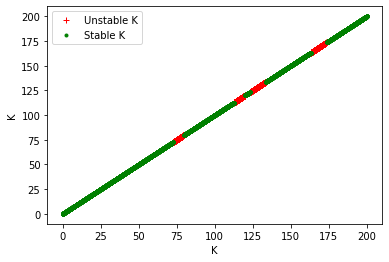

In [140]:
num = [1., 2., 4.]
den = [1, 11.4, 39., 43.6, 24., 0]
K = np.linspace(0,200,10000)

# Draw Root Locus
k, r = RootLocus(num, den, K)

# Plot stable and Unstable Gains
print('shape of r:', np.shape(r))
nr = len(den) - 1 # no. of roots
r_roots = [r[:,i] for i in range(nr)]
r_roots = np.reshape(r_roots, (len(k), nr))
print('size of r_roots: ', np.shape(r_roots))

posk_idx = np.where(r_roots >= 0)
posk_idx = np.unique(posk_idx[0])
print('size of posk_idx:', np.shape(posk_idx))

posk = k[posk_idx]
negk = np.delete(k, posk_idx, 0)
print('size of posk: ', np.shape(posk))
print('size of negk: ', np.shape(negk))

plt.plot(posk, posk, 'r+', label='Unstable K')
plt.plot(negk, negk, 'g.', label='Stable K' )
plt.xlabel('K')
plt.ylabel('K')
plt.legend(loc='best')



### Controller Design using root locus

**Example 1:** Design a **lead compensator** for the following system

$$G(s) = \frac{4}{s(s+2)} $$

- Add lead compensator to improve transient performance.
- Decide where to add the pole and zeroes
- Addition of Zeroes tend to pull the RL plot towards itself
- Addition of Poles tend to push the RL plot towards right

Controller:
$$G_c(s) = \frac{K(s+3)}{(s+6)}$$


Combined openloop system:
$$G_1 = \frac{4K(s+3)}{s(s+2)(s+6)}$$

 - Now select from the root locus plot to obtain desirable transient properties. 

In [169]:
num = [4]
den = [1, 2, 0]
K = np.linspace(0,100,1000)
k,r = RootLocus(num, den,K)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

In [148]:
num2 = [4, 12]
den2 = [1, 8, 12, 0]
K2 = np.linspace(0,100, 1000)
k,r = RootLocus(num2, den2, K2)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

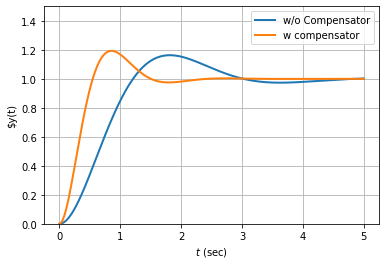

In [168]:
from control import *
num1 = [4]
den1 = [1, 2, 0]

# open-loop plant
g = tf(num1,den1)

K = 5.0
num2 = [1,3]
den2 = [1,6]

# Controller
c = tf(K*np.asarray(num2), den2)

# Unit feedback system
gc1 = feedback(g,1,-1)
# Closed-loop system with Compensator
gc2 = feedback(series(g,c),1,-1)

t = np.linspace(0,5,1000)
t, y1 = step_response(gc1, t)
t, y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='w/o Compensator')
plt.plot(t, y2, lw = 2, label='w compensator')
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')



In [181]:
import math

def time_spec(sigma, wd):
  theta = math.atan(sigma/wd)
  zeta = math.sin(theta)
  ts = 4/sigma
  mp = math.e**(-math.pi*sigma/wd)
  beta = math.atan(wd/sigma)
  tr = (math.pi - beta)/wd 

  print('zeta = {:.2f}'.format(zeta))
  print('Mp = {:.2f}'.format(mp))
  print('ts = {:.2f}'.format(ts))
  print('tr = {:.2f}'.format(tr))

# open-loop dominant poles
print('open-loop transient response paramters:')
sigma1 = 1
wd1 = math.sqrt(3)
time_spec(sigma1, wd1)

print('\n------------\n')

# closed-loop dominant poles
print('closed-loop transient response specs:')
sigma2 = 2.4
wd2 = 8.06
time_spec(sigma2, wd2)

open-loop transient response paramters:
zeta = 0.50
Mp = 0.16
ts = 4.00
tr = 1.21

------------

closed-loop transient response specs:
zeta = 0.29
Mp = 0.39
ts = 1.67
tr = 0.23


**Example 2:** Design a lag compensator for the following system

$$G(s) = \frac{1}{s(s+1)(s+2)}$$

Such that $K_v$ for compensated system becomes 10 times of that for the uncompensated system without changing the dominant poles. 

In [233]:
num1 = [1]
den1 = [1, 3, 2, 0]
K = np.linspace(0,100,1000)
k,r = RootLocus(num1, den1, K)

# closed-loop poles of uncompensated system
den_c1 = [1, 3, 2,1]
print('Uncompensated CL poles: ',np.roots(den_c1))

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

Uncompensated CL poles:  [-2.32471796+0.j         -0.33764102+0.56227951j -0.33764102-0.56227951j]


In [228]:
num_c = [1, 0.05]
den_c = [1, 0.005]

# Gc = G*C
num2 = np.polymul(num_c, num1)
den2 = np.polymul(den_c, den1)
print(num2)
print(den2)
xr = ((-0.4, 0.1))
yr = ((-0.5,0.5))
K = np.linspace(0,100, 50000)
k,r = RootLocus(num2, den2, K, xr, yr)

[1.   0.05]
[1.    3.005 2.015 0.01  0.   ]


interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

In [234]:
num_c = [1, 0.05]
den_c = [1, 0.005]

# Gc = G*C
num2 = np.polymul(num_c, num1)
den2 = np.polymul(den_c, den1)

K = np.linspace(0,100, 50000)
k,r = RootLocus(num2, den2, K)

interactive(children=(FloatSlider(value=0.0, description='K', step=0.001), Output()), _dom_classes=('widget-in…

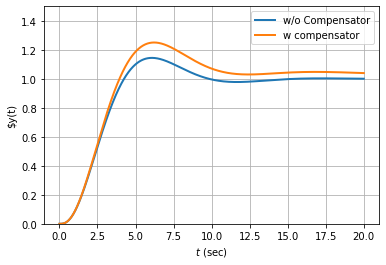

In [196]:
# Step Response
from control import *
# open-loop plant
num1 = [1]
den1 = [1, 3, 2, 0]
g = tf(num1,den1)

# Controller
K = 2.0
num2 = [1,0.05]
den2 = [1,0.005]
c = tf(K*np.asarray(num2), den2)

# Unit feedback system
gc1 = feedback(g,1,-1)
# Closed-loop system with Compensator
gc2 = feedback(series(g,c),1,-1)

t = np.linspace(0,20,1000)
t, y1 = step_response(gc1, t)
t, y2 = step_response(gc2, t)

plt.plot(t, y1, lw = 2, label='w/o Compensator')
plt.plot(t, y2, lw = 2, label='w compensator')
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)')
plt.ylim((0,1.5))
plt.grid()
plt.legend(loc='best')

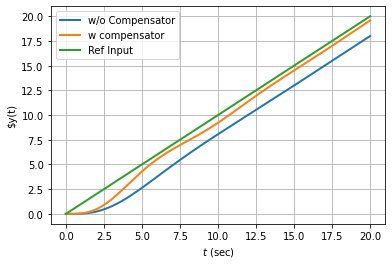

In [221]:
# Ramp response
from control import *

# open-loop plant
num1 = [1]
den1 = [1, 3, 2, 0]
g = tf(num1,den1)

# Controller
K = 2.0
num2 = [1,0.05]
den2 = [1,0.005]
c = tf(K*np.asarray(num2), den2)

# Unit feedback system
gc1 = feedback(g,1,-1)
# Closed-loop system with Compensator
gc2 = feedback(series(g,c),1,-1)

t = np.linspace(0,20,1000)
u = t
t, y1, x1 = forced_response(gc1, t, u)
t, y2, x2 = forced_response(gc2, t, u)

plt.plot(t, y1, lw = 2, label='w/o Compensator')
plt.plot(t, y2, lw = 2, label='w compensator')
plt.plot(t,u, lw = 2, label='Ref Input')
plt.xlabel('$t$ (sec)')
plt.ylabel('$y(t)')
plt.grid()
plt.legend(loc='best')

In [201]:

# for K = 1
sigma1 = 0.34
wd1 = 0.56
print('Time Specs for Open-loop system:')
time_spec(sigma1, wd1)

print('\n ---------------\n')
# for K = 1
sigma2 = 0.3
wd2 = 0.6
print('Time Specs for Closed-loop system:')
time_spec(sigma2, wd2)


Time Specs for Open-loop system:
zeta = 0.52
Mp = 0.15
ts = 11.76
tr = 3.78

 ---------------

Time Specs for Closed-loop system:
zeta = 0.45
Mp = 0.21
ts = 13.33
tr = 3.39


In [224]:
(math.atan(0.05) - math.atan(0.005))*180/math.pi

2.575928715834673

In [231]:
(math.atan(0.61/0.33)-math.atan((0.565/0.33)))*180/math.pi

1.8752915475934313